# <span style="color: blue;">Flight Prices - Primary</span>

##  <span style="color: blue;">Exploratory Data Analysis (EDA):</span>

#### Import libraries and import the dataset:

In [230]:
# import librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In this cell, we are importing essential libraries for our data analysis tasks:
- **pandas**: This library is crucial for data manipulation and analysis. It provides data structures like DataFrames, which allow us to store and manipulate structured data efficiently.
- **Matplotlib**: This library was imported for plotting graphs.
- **seaborn**: This library was imported for plotting graphs.
These libraries set the foundation for further data exploration and visualization.

In [231]:
# Step 1: Load the dataset
df = pd.read_csv('FlightsData.csv')

#### Overview of the dataset:

In [232]:
#Important info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505504 entries, 0 to 505503
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   company_name     505504 non-null  object
 1   flight_duration  505504 non-null  object
 2   price            504497 non-null  object
 3   departure_date   505504 non-null  object
 4   departure_time   505504 non-null  object
 5   arrival_time     505504 non-null  object
 6   stops            505504 non-null  object
 7   departure_city   505504 non-null  object
 8   arrival_city     505504 non-null  object
dtypes: object(9)
memory usage: 34.7+ MB
None


In [233]:
#number of rows and columns  (dataset size)
df.shape

(505504, 9)

Our dataset contains 505,504 rows, which represent individual records, and 9 columns, which represent different features or attributes of the data.

In [234]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  company_name flight_duration      price departure_date departure_time  \
0       Saudia    10 hr 30 min    SAR 824      9/24/2024        4:00 PM   
1       Saudia     4 hr 30 min  SAR 1,260      9/24/2024       10:00 PM   
2       Saudia    41 hr 35 min    SAR 941      9/24/2024        8:40 PM   
3       Saudia    39 hr 25 min    SAR 972      9/24/2024       10:50 PM   
4       Saudia    39 hr 25 min    SAR 972      9/24/2024       10:50 PM   

  arrival_time    stops departure_city arrival_city  
0    2:30 AM+1   1 stop            RUH          ULH  
1    2:30 AM+1   1 stop            RUH          ULH  
2    2:15 PM+2  2 stops            RUH          ULH  
3    2:15 PM+2  2 stops            RUH          ULH  
4    2:15 PM+2  2 stops            RUH          ULH  


This code displays the first few rows, allowing us to preview the initial records and get a sense of the data structure. This helps us understand the format and contents of the dataset.

In [235]:
# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
       company_name flight_duration      price departure_date departure_time  \
count        505504          505504     504497         505504         505504   
unique           24             388        631            366            221   
top          Saudia     1 hr 50 min  SAR 1,018     11/27/2024        9:05 AM   
freq         403560           12360       9456           1392          43642   

       arrival_time    stops departure_city arrival_city  
count        505504   505504         505504       505504  
unique          312        3             22           22  
top       2:15 PM+2  2 stops            RUH          RUH  
freq          25650   248278         248863       256641  


This statistical summary gives us an overview of the dataset. It shows the count of entries, the number of unique values, the most frequent values (top), and their frequencies (freq) for each column. For instance, out of 505,504 records, "Saudia" is the most frequent airline, appearing 403,560 times. The most common flight duration is 1 hr 50 min, occurring 12,360 times, while "RUH" is the most frequent departure city (248,863 times) and arrival city (256,641 times). We can also see that 2 stops is the most frequent number of stops (248,278 times).

In [236]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_columns)


Categorical columns: Index(['company_name', 'flight_duration', 'price', 'departure_date',
       'departure_time', 'arrival_time', 'stops', 'departure_city',
       'arrival_city'],
      dtype='object')


We extract the list of categorical columns from the dataset. Categorical columns contain non-numeric data such as names, dates, or labels. In this dataset, columns like company_name, flight_duration, price, and departure_city are considered categorical because they represent distinct categories or textual data. These columns will be important for analyzing non-numeric features.

In [237]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

# Drop rows with missing values
df_cleaned = df.dropna()

company_name          0
flight_duration       0
price              1007
departure_date        0
departure_time        0
arrival_time          0
stops                 0
departure_city        0
arrival_city          0
dtype: int64


We check for missing values in each column of the dataset. This shows how many records are missing in each column. For example, the price column has 1,007 missing values, while other columns like company_name and departure_time have no missing data.

In [238]:
#  Check for duplicates
duplicates = df[df.duplicated()]

#  Display the duplicates
if not duplicates.empty:
    print("Duplicate entries found:")
    print(duplicates)
else:
    print("No duplicate entries found.")

Duplicate entries found:
            company_name flight_duration      price departure_date  \
4                 Saudia    39 hr 25 min    SAR 972      9/24/2024   
5                 Saudia    39 hr 25 min    SAR 972      9/24/2024   
12                Saudia    41 hr 15 min  SAR 1,108      9/24/2024   
13                Saudia    41 hr 15 min  SAR 1,108      9/24/2024   
14                Saudia    41 hr 15 min  SAR 1,108      9/24/2024   
...                  ...             ...        ...            ...   
505462            Saudia     28 hr 5 min  SAR 1,424      9/24/2025   
505496  Saudia, EgyptAir    26 hr 55 min  SAR 3,589      9/24/2025   
505497  Saudia, EgyptAir    26 hr 55 min  SAR 3,589      9/24/2025   
505501  Saudia, EgyptAir           18 hr  SAR 4,097      9/24/2025   
505503  Saudia, EgyptAir    19 hr 30 min  SAR 4,361      9/24/2025   

       departure_time arrival_time    stops departure_city arrival_city  
4            10:50 PM    2:15 PM+2  2 stops            RUH  

We check for duplicate entries in the dataset, which can skew analysis and results. The output shows that we have 79,969 duplicate records. Each duplicate contains identical values across all columns, indicating that these entries represent the same flight details multiple times.

In [239]:
# Check data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
company_name       object
flight_duration    object
price              object
departure_date     object
departure_time     object
arrival_time       object
stops              object
departure_city     object
arrival_city       object
dtype: object


We check the data types of each column in the dataset to understand how the data is stored. All columns are currently classified as object, which typically means they contain textual data. This is notable for columns like price and flight_duration, which may require conversion to numerical types for analysis.

In [240]:
# For each categorical column, print unique values and their counts
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in company_name:
company_name
Saudia                             403560
Flynas                              19764
flydubai                            13908
Flyadeal                            12810
EgyptAir, Saudia                    10561
Qatar Airways                        6298
Saudia, EgyptAir                     5504
Gulf Air                             5124
Nile Air                             4819
FlyadealSaudia                       4392
EgyptAir                             4203
Etihad                               3225
Royal Jordanian, EgyptAir            2196
flydubai, Emirates                   2196
Oman Air                             1830
Gulf Air, Saudia                     1398
Emirates                             1098
Emirates, EgyptAir                    665
Turkish Airlines                      388
Pakistan International Airlines       366
Gulf AirSaudia                        366
Ethiopian, Flynas                     366
Air Cairo                      

For each categorical column in the dataset, we print the unique values and their counts. This helps us understand the diversity and frequency of each category. For example, in the company_name column, "Saudia" appears 403,560 times, while "Flynas" appears 19,764 times. The flight_duration column contains 388 unique durations, with "1 hr 50 min" being the most common, appearing 12,360 times.

Similarly, the price column has 631 unique values, with "SAR 1,018" being the most frequent, appearing 9,456 times. The departure_date shows 366 unique dates, and the departure_time and arrival_time columns have 221 and 312 unique times, respectively. The stops column indicates the number of stops, with "2 stops" being the most common at 248,278 occurrences. Lastly, the departure_city and arrival_city columns reveal a range of cities, with "RUH" being the most frequent departure city (248,863 occurrences) and arrival city (256,641 occurrences). This analysis provides valuable insights into the dataset's structure and distribution of values.

## EDA analysis

#### Visualizing company_name (Categorical)

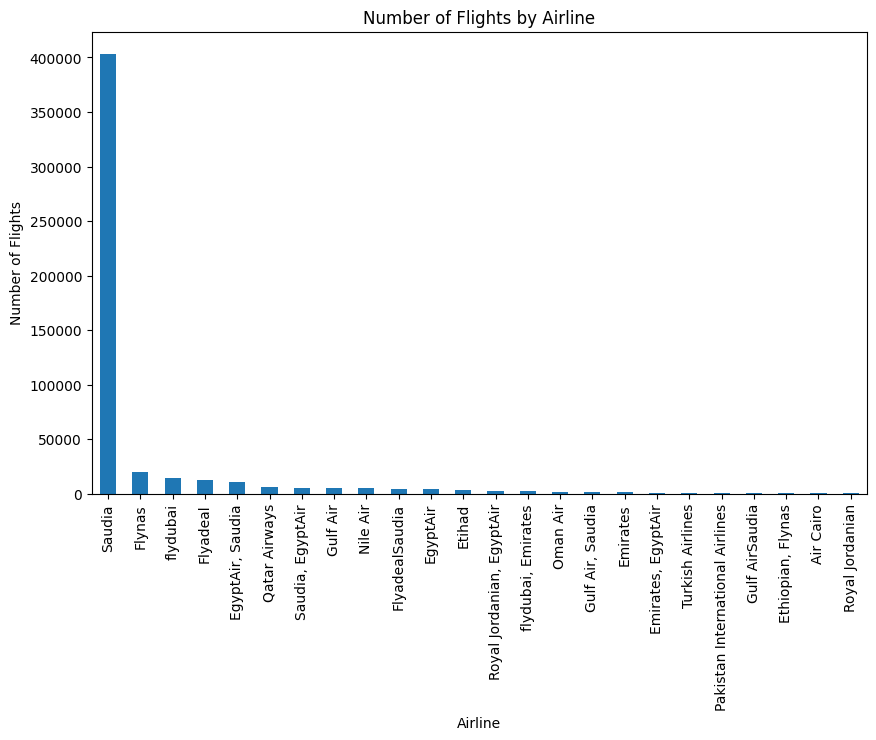

In [241]:
plt.figure(figsize=(10, 6))
df['company_name'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

We create a bar chart to visualize the number of flights by airline. This chart displays the frequency of flights for each airline, allowing us to easily compare their relative popularity. The x-axis represents the airlines, while the y-axis shows the total number of flights for each. Notably, "Saudia" has the most flights in our dataset, followed by "Flynas", highlighting there dominance in the market. This visualization provides valuable insights into market share and passenger preferences.

#### Visualizing flight_duration (Numerical)

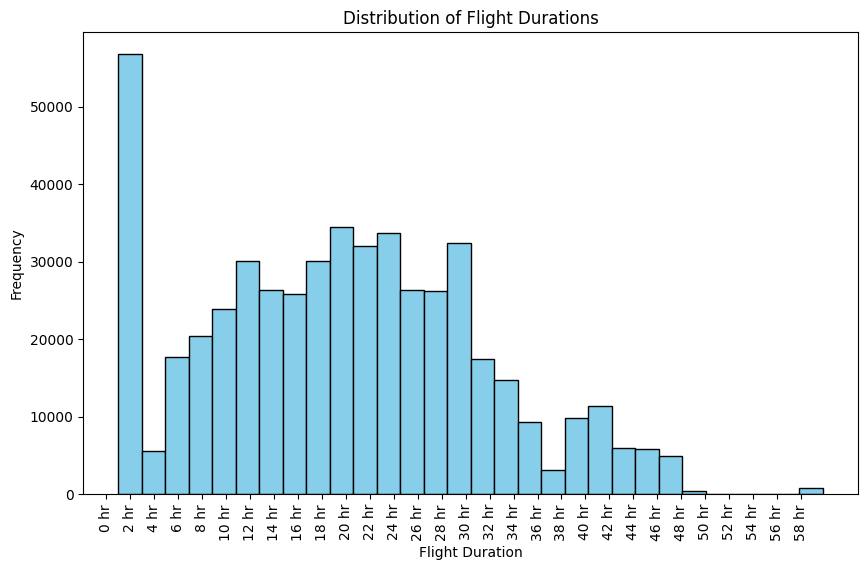

In [242]:
# Function to convert flight duration to total minutes
def convert_duration_to_minutes(duration):
    parts = duration.split()
    hours = int(parts[0])  # First part is always hours
    minutes = int(parts[2]) if len(parts) > 2 else 0  # If "min" exists, get the value
    return hours * 60 + minutes

# Convert flight_duration to total minutes
df['duration_minutes'] = df['flight_duration'].apply(convert_duration_to_minutes)

# Sort the DataFrame by the numerical duration
df = df.sort_values(by='duration_minutes')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['duration_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Durations')
plt.xlabel('Flight Duration')
plt.ylabel('Frequency')

# Customize ticks on the x-axis for readability
plt.xticks(
    ticks=range(0, max(df['duration_minutes']) + 1, 120),  # Every 2 hours
    labels=[f"{x // 60} hr" for x in range(0, max(df['duration_minutes']) + 1, 120)],
    rotation=90
)

plt.show()

We create a histogram to visualize the distribution of flight durations in the dataset. The x-axis represents the flight duration in hours, while the y-axis shows the frequency of flights for each duration range. By using 30 bins, we can observe how flight durations are spread across different intervals. This visualization helps us identify common flight durations and any potential outliers, providing insights into the typical lengths of flights available in our dataset.

#### Visualizing price (Numerical)

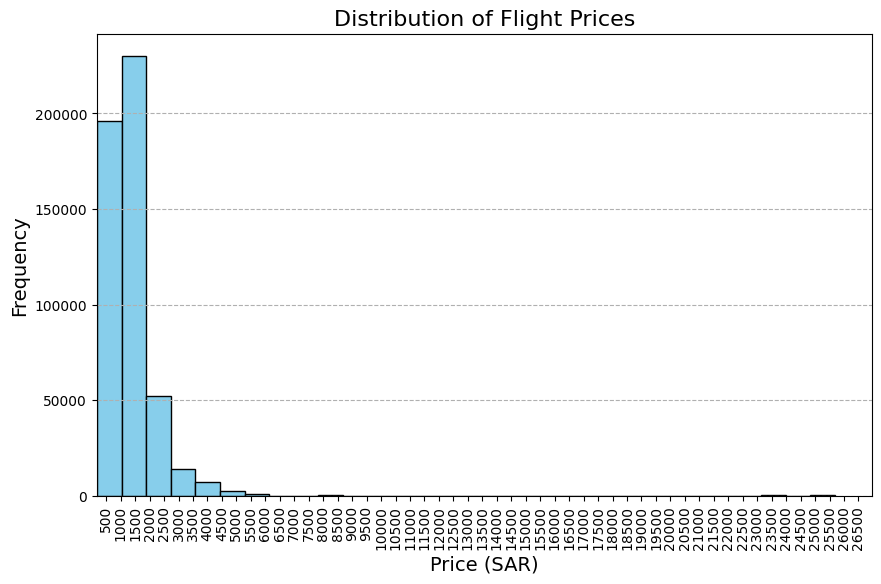

In [243]:
# Step 1: Clean the price column
df['price'] = df['price'].replace({'SAR ': '', ',': ''}, regex=True)  # Remove 'SAR' and commas
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric

# Step 2: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=30, color='skyblue', edgecolor='black')  # Drop NaN values for plotting
plt.title('Distribution of Flight Prices', fontsize=16)
plt.xlabel('Price (SAR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--')

# Set x-axis ticks with a specified range
min_price = df['price'].min()
max_price = df['price'].max()

# Ensure the x-axis starts from a meaningful minimum (e.g., not below 0)
plt.xlim(left=max(0, min_price))  # Set lower limit to 0 if min_price is negative
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(500))  # Show ticks every 500 SAR

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

plt.show()


Before visualizing the distribution of flight prices, we first clean the price column in the dataset. We removed the 'SAR' prefix and commas from the price values using regex, ensuring the data is in a consistent format. Next, we converted the cleaned values to a numeric data type using pd.to_numeric, which allows us to handle any potential errors by coercing invalid entries to NaN. This data cleaning step is crucial for accurate analysis and visualization.

Then, we created a histogram to visualize the distribution of flight prices in the dataset. The x-axis represents the flight prices in Saudi Riyals (SAR), while the y-axis indicates the frequency of flights for each price range. This visualization helps us identify common price ranges for flights and any potential outliers, providing insights into the pricing trends within our dataset. As stated before, the most frequent price is 1018 SAR.

#### Visualizing departure_date (Categorical)

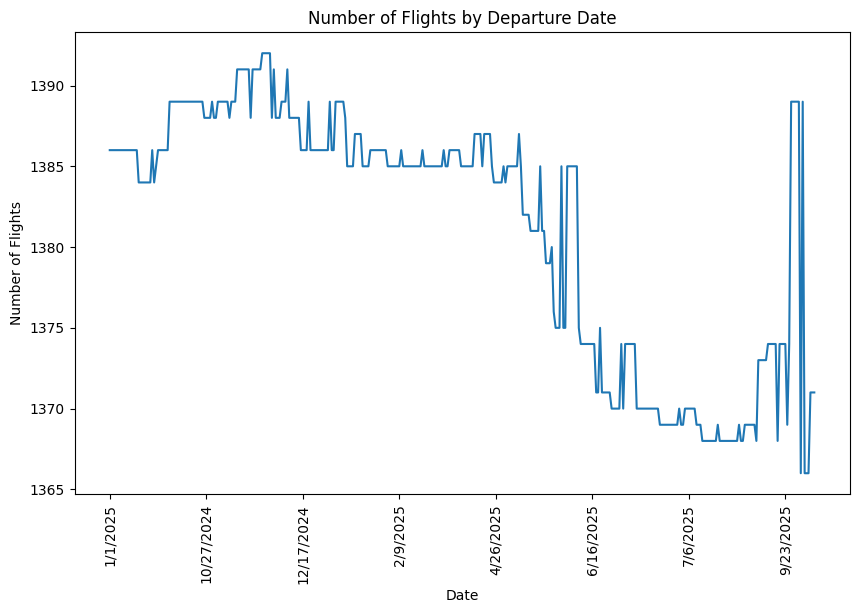

In [244]:
plt.figure(figsize=(10, 6))
df['departure_date'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Flights by Departure Date')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

In this visualization, we presented a line plot to illustrate the number of flights scheduled for each departure date. The x-axis represents the departure dates, while the y-axis shows the corresponding count of flights for those dates. By sorting the data by date, we can observe trends and fluctuations in flight availability over time. This plot enables us to identify peak travel periods and potentially correlate them with seasonal demand or special events, providing valuable insights into the scheduling patterns of flights within our dataset. Th most frequent date is 11 / 27 / 2024.

#### Visualizing departure_time (Categorical)

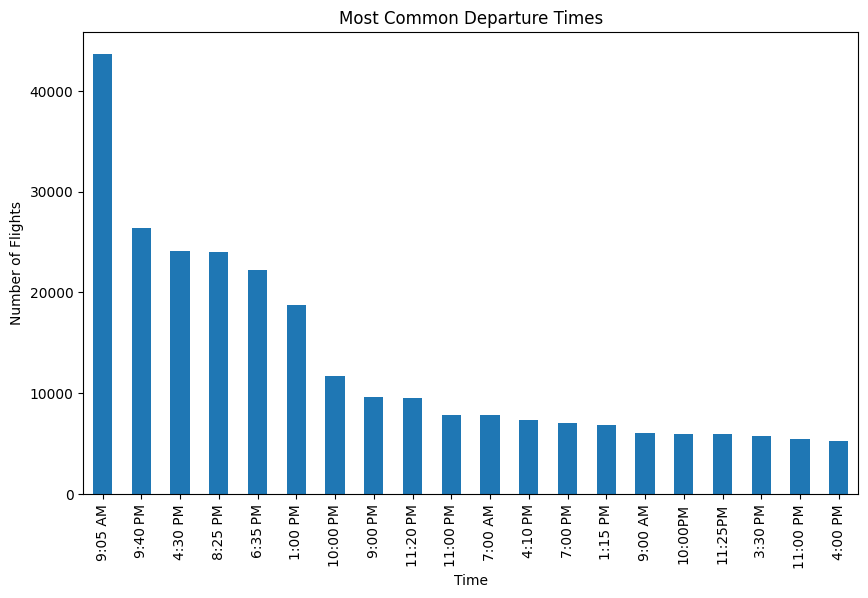

In [245]:
plt.figure(figsize=(10, 6))
df['departure_time'].value_counts().head(20).plot(kind='bar')
plt.title('Most Common Departure Times')
plt.xlabel('Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

This bar plot displays the most common departure times for flights in the dataset. The x-axis represents the departure times, while the y-axis indicates the number of flights scheduled for each time. By focusing on the top 20 departure times, we can easily identify peak hours of flight departures. This visualization helps in understanding travel patterns and preferences among passengers, as well as aiding airlines in optimizing their schedules based on the most frequently chosen departure times. The most frequent departure time is 9:05 AM.

#### Visualizing arrival_time (Categorical)

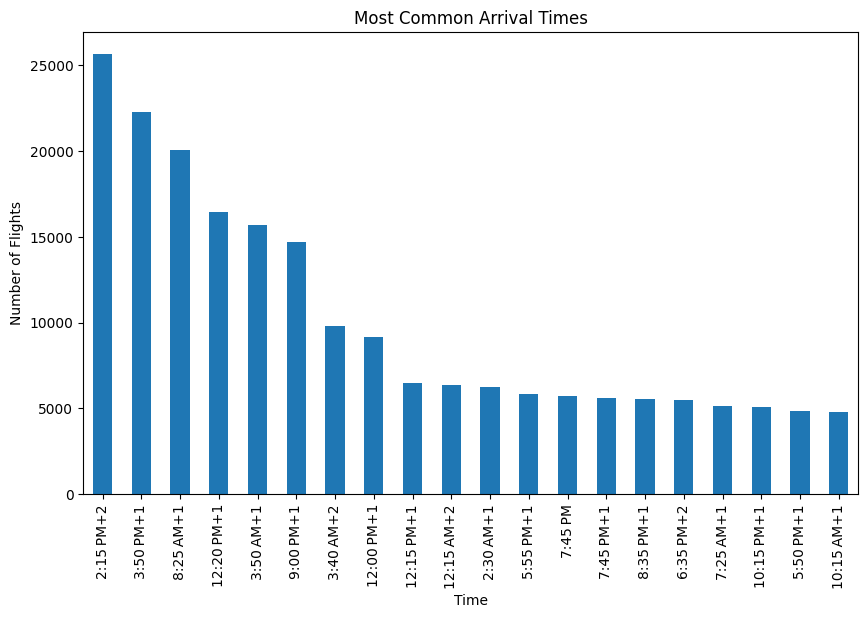

In [246]:
plt.figure(figsize=(10, 6))
df['arrival_time'].value_counts().head(20).plot(kind='bar')
plt.title('Most Common Arrival Times')
plt.xlabel('Time')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

This bar plot illustrates the most common arrival times for flights within the dataset. The x-axis represents the arrival times, while the y-axis shows the number of flights arriving at each specified time. By highlighting the top 20 arrival times, we can effectively identify the busiest periods for arrivals. This visualization provides insights into travel patterns, helping both airlines and travelers understand when flights are most likely to land, which can aid in planning and logistics. Th emost frequent arrival time is 2:15 PM+2.

#### Visualizing stops (Categorical)

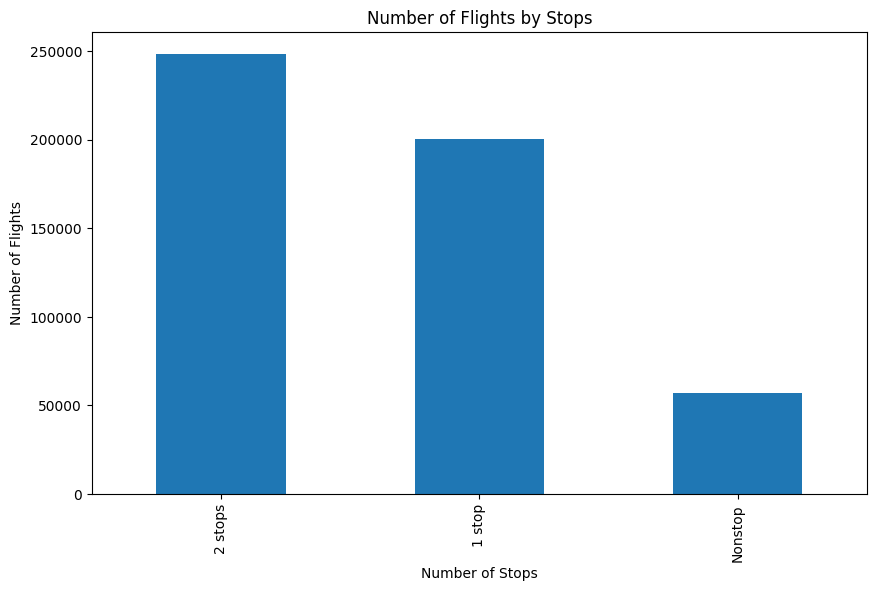

In [247]:
plt.figure(figsize=(10, 6))
df['stops'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Number of Flights')
plt.show()

This bar plot displays the distribution of flights based on the number of stops. The x-axis represents the number of stops (Nonstop, 1 stop, and 2 stops), while the y-axis shows the corresponding number of flights for each category. This visualization highlights the preferences of travelers in terms of flight routes, indicating whether passengers favor nonstop flights or are willing to take flights with one or more stops. Understanding these trends can assist airlines in optimizing their schedules and catering to passenger demands effectively. Clearly, the most frequent is 2 stops.

#### Visualizing departure_city (Categorical)

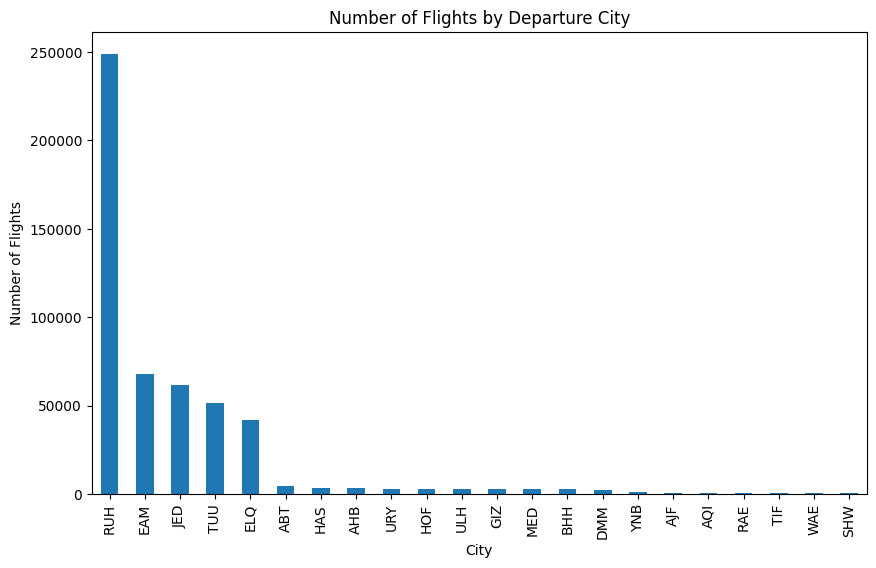

In [248]:
plt.figure(figsize=(10, 6))
df['departure_city'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Departure City')
plt.xlabel('City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

This bar plot illustrates the number of flights originating from various departure cities. The x-axis represents the cities, while the y-axis indicates the total number of flights departing from each location. The city with the highest number of flights is Riyadh (RUH), highlighting it as a major hub for air travel. By visualizing this data, we can identify the busiest airports and cities, providing insights into travel patterns and preferences.

#### Visualizing arrival_city (Categorical)

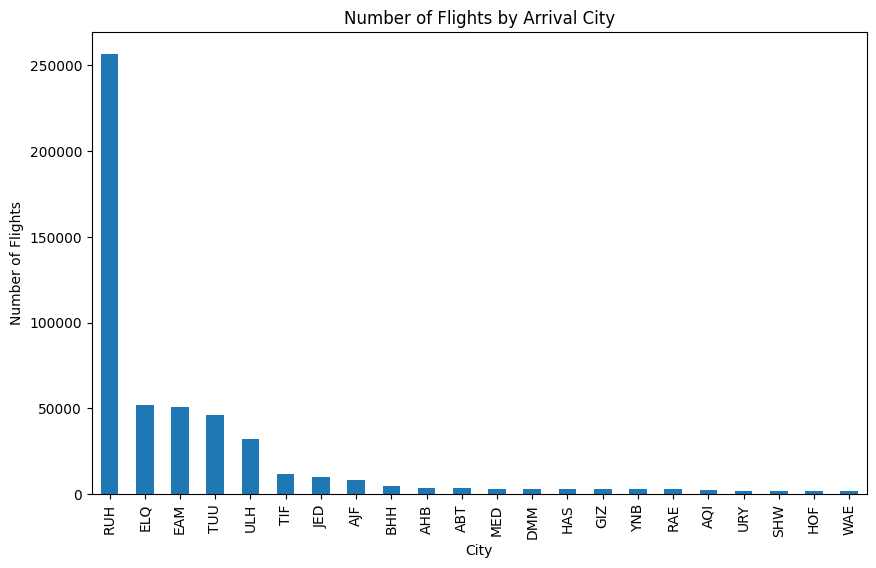

In [249]:
plt.figure(figsize=(10, 6))
df['arrival_city'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Arrival City')
plt.xlabel('City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

This bar plot displays the number of flights arriving at various cities. The x-axis represents the cities, while the y-axis indicates the total number of flights arriving at each location. The city with the highest number of arrivals is Riyadh (RUH), showcasing its significance as a key destination in our dataset. This visualization provides insights into travel trends and can assist airlines and travel agencies in understanding destination popularity.

## Correlation Analysis

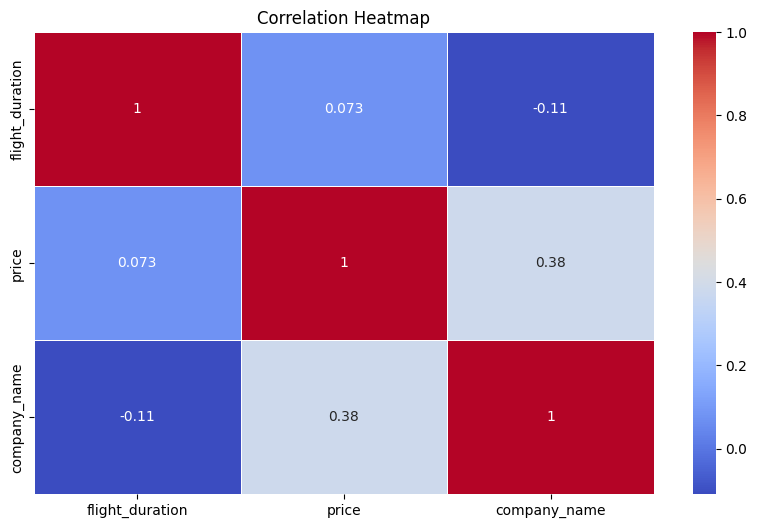

In [250]:
# Function to convert flight duration to total minutes
def convert_duration(duration):
    parts = duration.split(' ')
    hours = int(parts[0]) * 60  # Convert hours to minutes
    minutes = int(parts[2]) if len(parts) > 2 else 0  # Convert minutes (if present)
    return hours + minutes

# Convert flight duration to numeric format
dfQ = pd.read_csv('FlightsData.csv')
dfQ['flight_duration'] = df['flight_duration'].apply(convert_duration)

# Convert price to numeric format
dfQ['price'] = pd.to_numeric(dfQ['price'].replace({'SAR':'', ',':''}, regex=True), errors='coerce')

# Create a copy for encoding
df_encoded = dfQ.copy()

# Encode categorical columns
df_encoded['company_name'] = pd.factorize(dfQ['company_name'])[0]
df_encoded['departure_city'] = pd.factorize(dfQ['departure_city'])[0]
df_encoded['arrival_city'] = pd.factorize(dfQ['arrival_city'])[0]

# Ensure there are no missing values in the relevant columns
df_encoded = df_encoded.dropna(subset=['flight_duration', 'price'])

# Calculate correlation
correlation_matrix = df_encoded[['flight_duration', 'price', 'company_name']].corr()

# Plotting correlation heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


We first defined a function to convert flight durations from a string format into total minutes. The flight duration and price columns are then cleaned and converted to numeric formats for analysis. Categorical columns for company names and city names are encoded using factorization to facilitate numerical analysis. Missing values in the relevant columns are removed to ensure accurate correlation calculations. Finally, a correlation heatmap is generated to visualize the relationships among flight duration, price, and company names.

The weak positive correlation between flight duration and price (0.073) indicates that the length of a flight has minimal impact on its cost. There is a moderate positive correlation (0.38) between price and airline company, suggesting that different airlines tend to price flights differently, possibly due to brand, service levels, or market strategy. Lastly, the negative correlation (-0.11) between flight duration and airline company is weak, indicating that flight duration is not strongly associated with any particular airline.

##  <span style="color: blue;">Data Cleaning & Processing</span>

###  <span style="color: blue;">Step 1: Import Required Libraries</span>

In [251]:
import re
import numpy as np

In this cell, we are importing essential libraries for our data analysis tasks:
- **pandas**: This library is crucial for data manipulation and analysis. It provides data structures like DataFrames, which allow us to store and manipulate structured data efficiently.
- **numpy**: This library supports numerical operations on arrays and matrices. It's useful for performing mathematical functions and handling large datasets.
- **re**: This module provides support for regular expressions, which can be helpful for string manipulation and cleaning tasks, such as removing unwanted characters or patterns from our dataset.

###  <span style="color: blue;">Step 2: Handling missing values </span>

In [252]:
missing_data = df.isnull().sum()
print(missing_data)

company_name           0
flight_duration        0
price               1007
departure_date         0
departure_time         0
arrival_time           0
stops                  0
departure_city         0
arrival_city           0
duration_minutes       0
dtype: int64


### <span style="color: blue;">Step 3: Data cleaning </span>

In [253]:
# Cleaning the 'price' column: remove 'SAR' and commas, convert to float
df['price'] = df['price'].replace({'SAR ': '', ',': ''}, regex=True).astype(float)

We cleaned the 'price' column by removing the 'SAR' label and commas, and converting the values to float for numerical analysis.

In [254]:
# Check for missing prices
missing_prices = df['price'].isnull().sum()
print("Number of missing prices:", missing_prices)

# Fill missing prices using the median of similar flights
# For example, we can group by 'company_name' and 'departure_city'
median_prices = df.groupby(['company_name', 'departure_city'])['price'].median()

# Fill missing values in the 'price' column
for index, row in df[df['price'].isnull()].iterrows():
    # Get the median price for the group of similar flights
    median_price = median_prices.get((row['company_name'], row['departure_city']), np.nan)
    # Fill the missing price if median_price is available
    if pd.notnull(median_price):
        df.at[index, 'price'] = median_price

# Check if there are any missing prices left
missing_prices_after = df['price'].isnull().sum()
print("Number of missing prices after filling:", missing_prices_after)

Number of missing prices: 1007
Number of missing prices after filling: 0


To fill the missing price values, we can utilize the median prices of similar flights. This is achieved by grouping the dataset based on relevant attributes, such as 'company_name' and 'departure_city'. By applying the groupby() method followed by the median() function on the 'price' column, we obtain a series of median prices for each group. This step is crucial as it leverages existing data to make informed estimates for the missing values.After calculating the median prices, we proceed to fill the missing values in the 'price' column. We iterate through the entries in the dataset where the 'price' is null, and for each of these entries, we find the corresponding median price from the previously calculated series based on their 'company_name' and 'departure_city'. This ensures that the missing price values are filled with the most representative estimate based on similar flights, thereby enhancing the quality of the dataset.

In [255]:
# Clean the 'departure_time' and 'arrival_time' columns to remove weird symbols
df['departure_time'] = df['departure_time'].str.replace(r'[\u200B-\u200D\u202F\u00A0]', '', regex=True)
df['arrival_time'] = df['arrival_time'].str.replace(r'[\u200B-\u200D\u202F\u00A0]', '', regex=True)

In this cell, we are cleaning the departure_time and arrival_time columns by removing unwanted symbols:

df['departure_time'].str.replace(...): This method uses string manipulation to replace specific characters in the departure_time column. The regular expression r'[\u200B-\u200D\u202F\u00A0]' specifies a range of Unicode characters to be removed:

- \u200B (Zero Width Space)
- \u200C (Zero Width Non-Joiner)
- \u200D (Zero Width Joiner)
- \u202F (Narrow Non-Breaking Space)
- \u00A0 (Non-Breaking Space)
- The same cleaning process is applied to the arrival_time column.

By removing these unwanted symbols, we ensure that the time data is clean and properly formatted for any subsequent analyses or transformations. Clean data is crucial for accurate calculations and visualizations.

#### Removing the word "stops" from the stops column

In [256]:
# Ensure all values are treated as strings, then use regex to replace ' stop' or ' stops' with an empty string
df['stops'] = df['stops'].astype(str).str.replace(r'\s*stops?', '', regex=True).str.strip()

# Convert the cleaned 'stops' column to numeric
df['stops'] = pd.to_numeric(df['stops'], errors='coerce')

# Convert the numeric column to integers (if not NaN)
df['stops'] = df['stops'].fillna(0).astype(int)  # Replace NaN with 0 and convert to int

We cleaned the 'stops' column by removing any 'stop' or 'stops' text, convert to numeric, and replaced NaNs with 0 before changing to integers.

### <span style="color: blue;">Handling duplicate data

 When we encounter duplicate data in our dataset, it can significantly undermine the integrity and reliability of our analyses. The presence of multiple identical entries may lead to several issues, including:
Skewed Analysis: Duplicates can distort our statistical analyses, such as averages, medians, or totals, which may result in inaccurate insights and conclusions.
Misleading Results: In our data-driven decision-making processes, duplicates can create false patterns or trends, leading us to misguided strategies or actions.
Increased Processing Time: Duplicates inflate the size of our dataset, causing longer processing times for data operations and potentially impacting performance and efficiency.
Compromised Data Quality: The presence of duplicate records raises questions about our data quality, which can erode trust among stakeholders and users who rely on our dataset for accurate information.
Complicated Data Management: Handling duplicates complicates our data management tasks, such as reporting and data validation, making it more challenging for us to maintain a clean and organized dataset.
To ensure the reliability and effectiveness of our analyses, it is crucial that we identify and address duplicate entries in the dataset before proceeding with further data processing.

In [257]:
duplicate_rows = df.duplicated()

# To view the duplicate rows
df[duplicate_rows]

,company_name,flight_duration,price,departure_date,departure_time,arrival_time,stops,departure_city,arrival_city,duration_minutes
216339,Saudia,1 hr 40 min,903.0,9/15/2025,7:45PM,9:25PM,0,ABT,RUH,100
259647,Saudia,1 hr 40 min,903.0,9/16/2025,7:45PM,9:25PM,0,ABT,RUH,100
259629,Saudia,1 hr 40 min,903.0,9/14/2025,7:45PM,9:25PM,0,ABT,RUH,100
259620,Saudia,1 hr 40 min,903.0,9/13/2025,7:45PM,9:25PM,0,ABT,RUH,100
259611,Saudia,1 hr 40 min,903.0,9/12/2025,7:45PM,9:25PM,0,ABT,RUH,100
...,...,...,...,...,...,...,...,...,...,...
248538,"EgyptAir, Saudia",47 hr 25 min,2864.0,12/21/2024,10:00PM,9:25PM+2,2,RUH,SHW,2845
248580,"EgyptAir, Saudia",47 hr 25 min,2864.0,12/27/2024,10:00PM,9:25PM+2,2,RUH,SHW,2845
248558,"EgyptAir, Saudia",47 hr 25 min,2864.0,12/24/2024,10:00PM,9:25PM+2,2,RUH,SHW,2845
248545,"EgyptAir, Saudia",47 hr 25 min,2864.0,12/22/2024,10:00PM,9:25PM+2,2,RUH,SHW,2845


The result of this operation reveals a table consisting of 80,312 rows and 9 columns, indicating a significant number of duplicates present in our dataset. This highlights the importance of addressing these duplicates to maintain the integrity and accuracy of our data analysis.

In [258]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 80312


We employed this method to cross-verify the accuracy of our earlier findings regarding duplicate rows, where we identified the duplicates through a separate filtering process. Our analysis confirms that there are 80,312 duplicate rows in total. This significant number underscores the necessity of addressing duplicate data to ensure the accuracy and reliability of our subsequent analyses.

In [259]:
# Dropping duplicates (if any)
df = df.drop_duplicates(keep='first')

In this step, we removed all duplicate rows from the dataset, but retained the first occurrence of each duplicate. The keep='first' argument ensures that the first instance of any duplicate is kept, while subsequent duplicates are removed.

In [260]:
# Count the number of duplicate rows in the cleaned dataset
num_duplicates_cleaned = df.duplicated().sum()

# Print the number of duplicates in the cleaned dataset
print("Number of duplicate rows in the cleaned data:", num_duplicates_cleaned)

Number of duplicate rows in the cleaned data: 0


The use of df.duplicated().sum() allows us to confirm that our cleaning process was effective. The output indicates that there are 0 duplicate rows in the cleaned data, demonstrating the success of our cleaning efforts and ensuring that the dataset is ready for further analysis.

###  <span style="color: blue;">Step 4: Data processing </span>

In [261]:


def convert_duration_to_minutes(duration_str):
    # Check if the input is not a string
    if not isinstance(duration_str, str):
        return np.nan  # Return NaN for non-string inputs
    
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return np.nan  # Return NaN for null or empty strings
    
    # Using a more flexible regex pattern
    match = re.match(r'(?:(\d+)\s*hour(?:s)?|(\d+)\s*hr(?:s)?)?\s*(?:(\d+)\s*minute(?:s)?|(\d+)\s*min(?:s)?)?', duration_str.strip(), re.IGNORECASE)
    
    if match is None:
        print(f"Unmatched duration string: '{duration_str}'")  # Debugging output
        return np.nan  # If format is unexpected, return NaN
    
    # Handle the cases where only hours are present
    hours = int(match.group(1)) * 60 if match.group(1) else (int(match.group(2)) * 60 if match.group(2) else 0)
    
    # Handle minutes: if minutes are present, get them; otherwise, set to 0
    minutes = int(match.group(3)) if match.group(3) else (int(match.group(4)) if match.group(4) else 0)
    
    return hours + minutes  # Total minutes

# Example of converting the 'flight_duration' column
df['flight_duration'] = df['flight_duration'].apply(convert_duration_to_minutes)
print(df.head())


       company_name  flight_duration  price departure_date departure_time  \
221210     Flyadeal               60  329.0       8/9/2025         9:10PM   
221234     Flyadeal               60  329.0      8/13/2025         9:10PM   
221204     Flyadeal               60  329.0       8/8/2025         9:10PM   
221222     Flyadeal               60  329.0      8/11/2025         9:10PM   
220814     Flyadeal               60  329.0       6/4/2025         9:10PM   

       arrival_time  stops departure_city arrival_city  duration_minutes  
221210      10:10PM      0            DMM          RUH                60  
221234      10:10PM      0            DMM          RUH                60  
221204      10:10PM      0            DMM          RUH                60  
221222      10:10PM      0            DMM          RUH                60  
220814      10:10PM      0            DMM          RUH                60  


We converted flight durations from strings (e.g., "2 hours 30 minutes") to total minutes for easier numerical analysis and comparison.

## <span style="color: blue;">Preaper the Data to be compared

To compare the primary data with the secondary one we need to align the names of the columns and the formats

#### <span style="color: blue;">Changing the name of the coulmns to match the secoundrey data

In [262]:
# Renaming the columns as requested
df.rename(columns={
    'company_name': 'Airline',
    'flight_duration': 'Flight Duration',
    'price': 'Price',
    'departure_date': 'Departure Date',
    'departure_time': 'Departure Time',
    'arrival_time': 'Arrival Time',
    'stops': 'Number Of Stops',
    'departure_city': 'Departure City',
    'arrival_city': 'Arrival City'
}, inplace=True)

# Display the first few rows to confirm the changes
print(df.head())

         Airline  Flight Duration  Price Departure Date Departure Time  \
221210  Flyadeal               60  329.0       8/9/2025         9:10PM   
221234  Flyadeal               60  329.0      8/13/2025         9:10PM   
221204  Flyadeal               60  329.0       8/8/2025         9:10PM   
221222  Flyadeal               60  329.0      8/11/2025         9:10PM   
220814  Flyadeal               60  329.0       6/4/2025         9:10PM   

       Arrival Time  Number Of Stops Departure City Arrival City  \
221210      10:10PM                0            DMM          RUH   
221234      10:10PM                0            DMM          RUH   
221204      10:10PM                0            DMM          RUH   
221222      10:10PM                0            DMM          RUH   
220814      10:10PM                0            DMM          RUH   

        duration_minutes  
221210                60  
221234                60  
221204                60  
221222                60  
220814     

#### <span style="color: blue;">Changing "Arrival Time", and "Departure Time" data type format to 24 hour

In [263]:

# Removing the '+1', '+2', etc., from the 'Arrival Time' column
df['Arrival Time'] = df['Arrival Time'].apply(lambda x: re.sub(r'\+\d+', '', x))


# Convert 'Departure Time' and 'Arrival Time' to 24-hour format
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%I:%M%p', errors='coerce').dt.time
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%I:%M%p', errors='coerce').dt.time

# Checking the first few rows to verify the changes
df[['Departure Time', 'Arrival Time']].head()

,Departure Time,Arrival Time
221210,21:10:00,22:10:00
221234,21:10:00,22:10:00
221204,21:10:00,22:10:00
221222,21:10:00,22:10:00
220814,21:10:00,22:10:00


### <span style="color: blue;">Adding a new column "Flight Lands Next Day"

In [264]:
# Adding a new column 'Flight Lands Next Day' with binary values based on the condition
df['Flight Lands Next Day'] = df.apply(
    lambda row: 1 if row['Arrival Time'] and row['Departure Time'] and row['Arrival Time'].hour < row['Departure Time'].hour else 0,
    axis=1
)

# Checking the updated dataset with the new column
df[['Departure Time', 'Arrival Time', 'Flight Lands Next Day']].head()

,Departure Time,Arrival Time,Flight Lands Next Day
221210,21:10:00,22:10:00,0
221234,21:10:00,22:10:00,0
221204,21:10:00,22:10:00,0
221222,21:10:00,22:10:00,0
220814,21:10:00,22:10:00,0


### <span style="color: blue;">Adding a new column "Arrival Date"

In [265]:
# First, convert the 'Departure Date' column to a datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%m/%d/%Y', errors='coerce')

# Adding the new 'Arrival Date' column based on the condition
df['Arrival Date'] = df.apply(
    lambda row: row['Departure Date'] + pd.Timedelta(days=1) if row['Flight Lands Next Day'] == 1 else row['Departure Date'],
    axis=1
)

# Checking the updated dataset with the new 'Arrival Date' column
df[['Departure Date', 'Arrival Date', 'Flight Lands Next Day']].head()

,Departure Date,Arrival Date,Flight Lands Next Day
221210,2025-08-09,2025-08-09,0
221234,2025-08-13,2025-08-13,0
221204,2025-08-08,2025-08-08,0
221222,2025-08-11,2025-08-11,0
220814,2025-06-04,2025-06-04,0


### <span style="color: blue;">Change the data types of the specified columns in the Primary dataset to match Secondary 

In [266]:
# Change the data types of the specified columns in the Primary dataset
df['Price'] = df['Price'].astype('float64')
df['Flight Duration'] = df['Flight Duration'].astype('float64')

# Verify the changes
df.dtypes

Airline                          object
Flight Duration                 float64
Price                           float64
Departure Date           datetime64[ns]
Departure Time                   object
Arrival Time                     object
Number Of Stops                   int64
Departure City                   object
Arrival City                     object
duration_minutes                  int64
Flight Lands Next Day             int64
Arrival Date             datetime64[ns]
dtype: object

In [ ]:
# Calculate correlation
correlation_matrix = df_encoded[['Flight Duration', 'Price', 'Airline']].corr()

# Plotting correlation heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### <span style="color: blue;">Saving the updated dataset to a new CSV file after the changes have been made

In [267]:
# Save the cleaned data to a new CSV file
df.to_csv('FINALPrimaryDataCleaned.csv', index=False)